## 1. Problem definition

In [ ]:
# Learn
# AirBnB是一个短期租赁市场，允许您列出部分或全部的生活空间供他人租用。 你可以租一间公寓的房间，在AirBnB上租你的整个房子。 
# 由于大多数房源都是短期的，因此AirBnB已经成为酒店流行的替代品。 
# 公司本身已经从2008年成立至2016年的300亿美元估值，目前的价值比世界上任何连锁酒店都要高。

# 主机寻找租赁生活空间面临的一个挑战是确定最优的夜租租金。 
# 在很多地方，租房者都会收到一个很好的房源信息，并且可以根据价格，卧室数量，房间类型等条件进行筛选。 
# 由于AirBnB是一个市场，主机每晚可以收取的金额与市场的动态密切相关。 以下是AirBnB上的搜索体验截图：

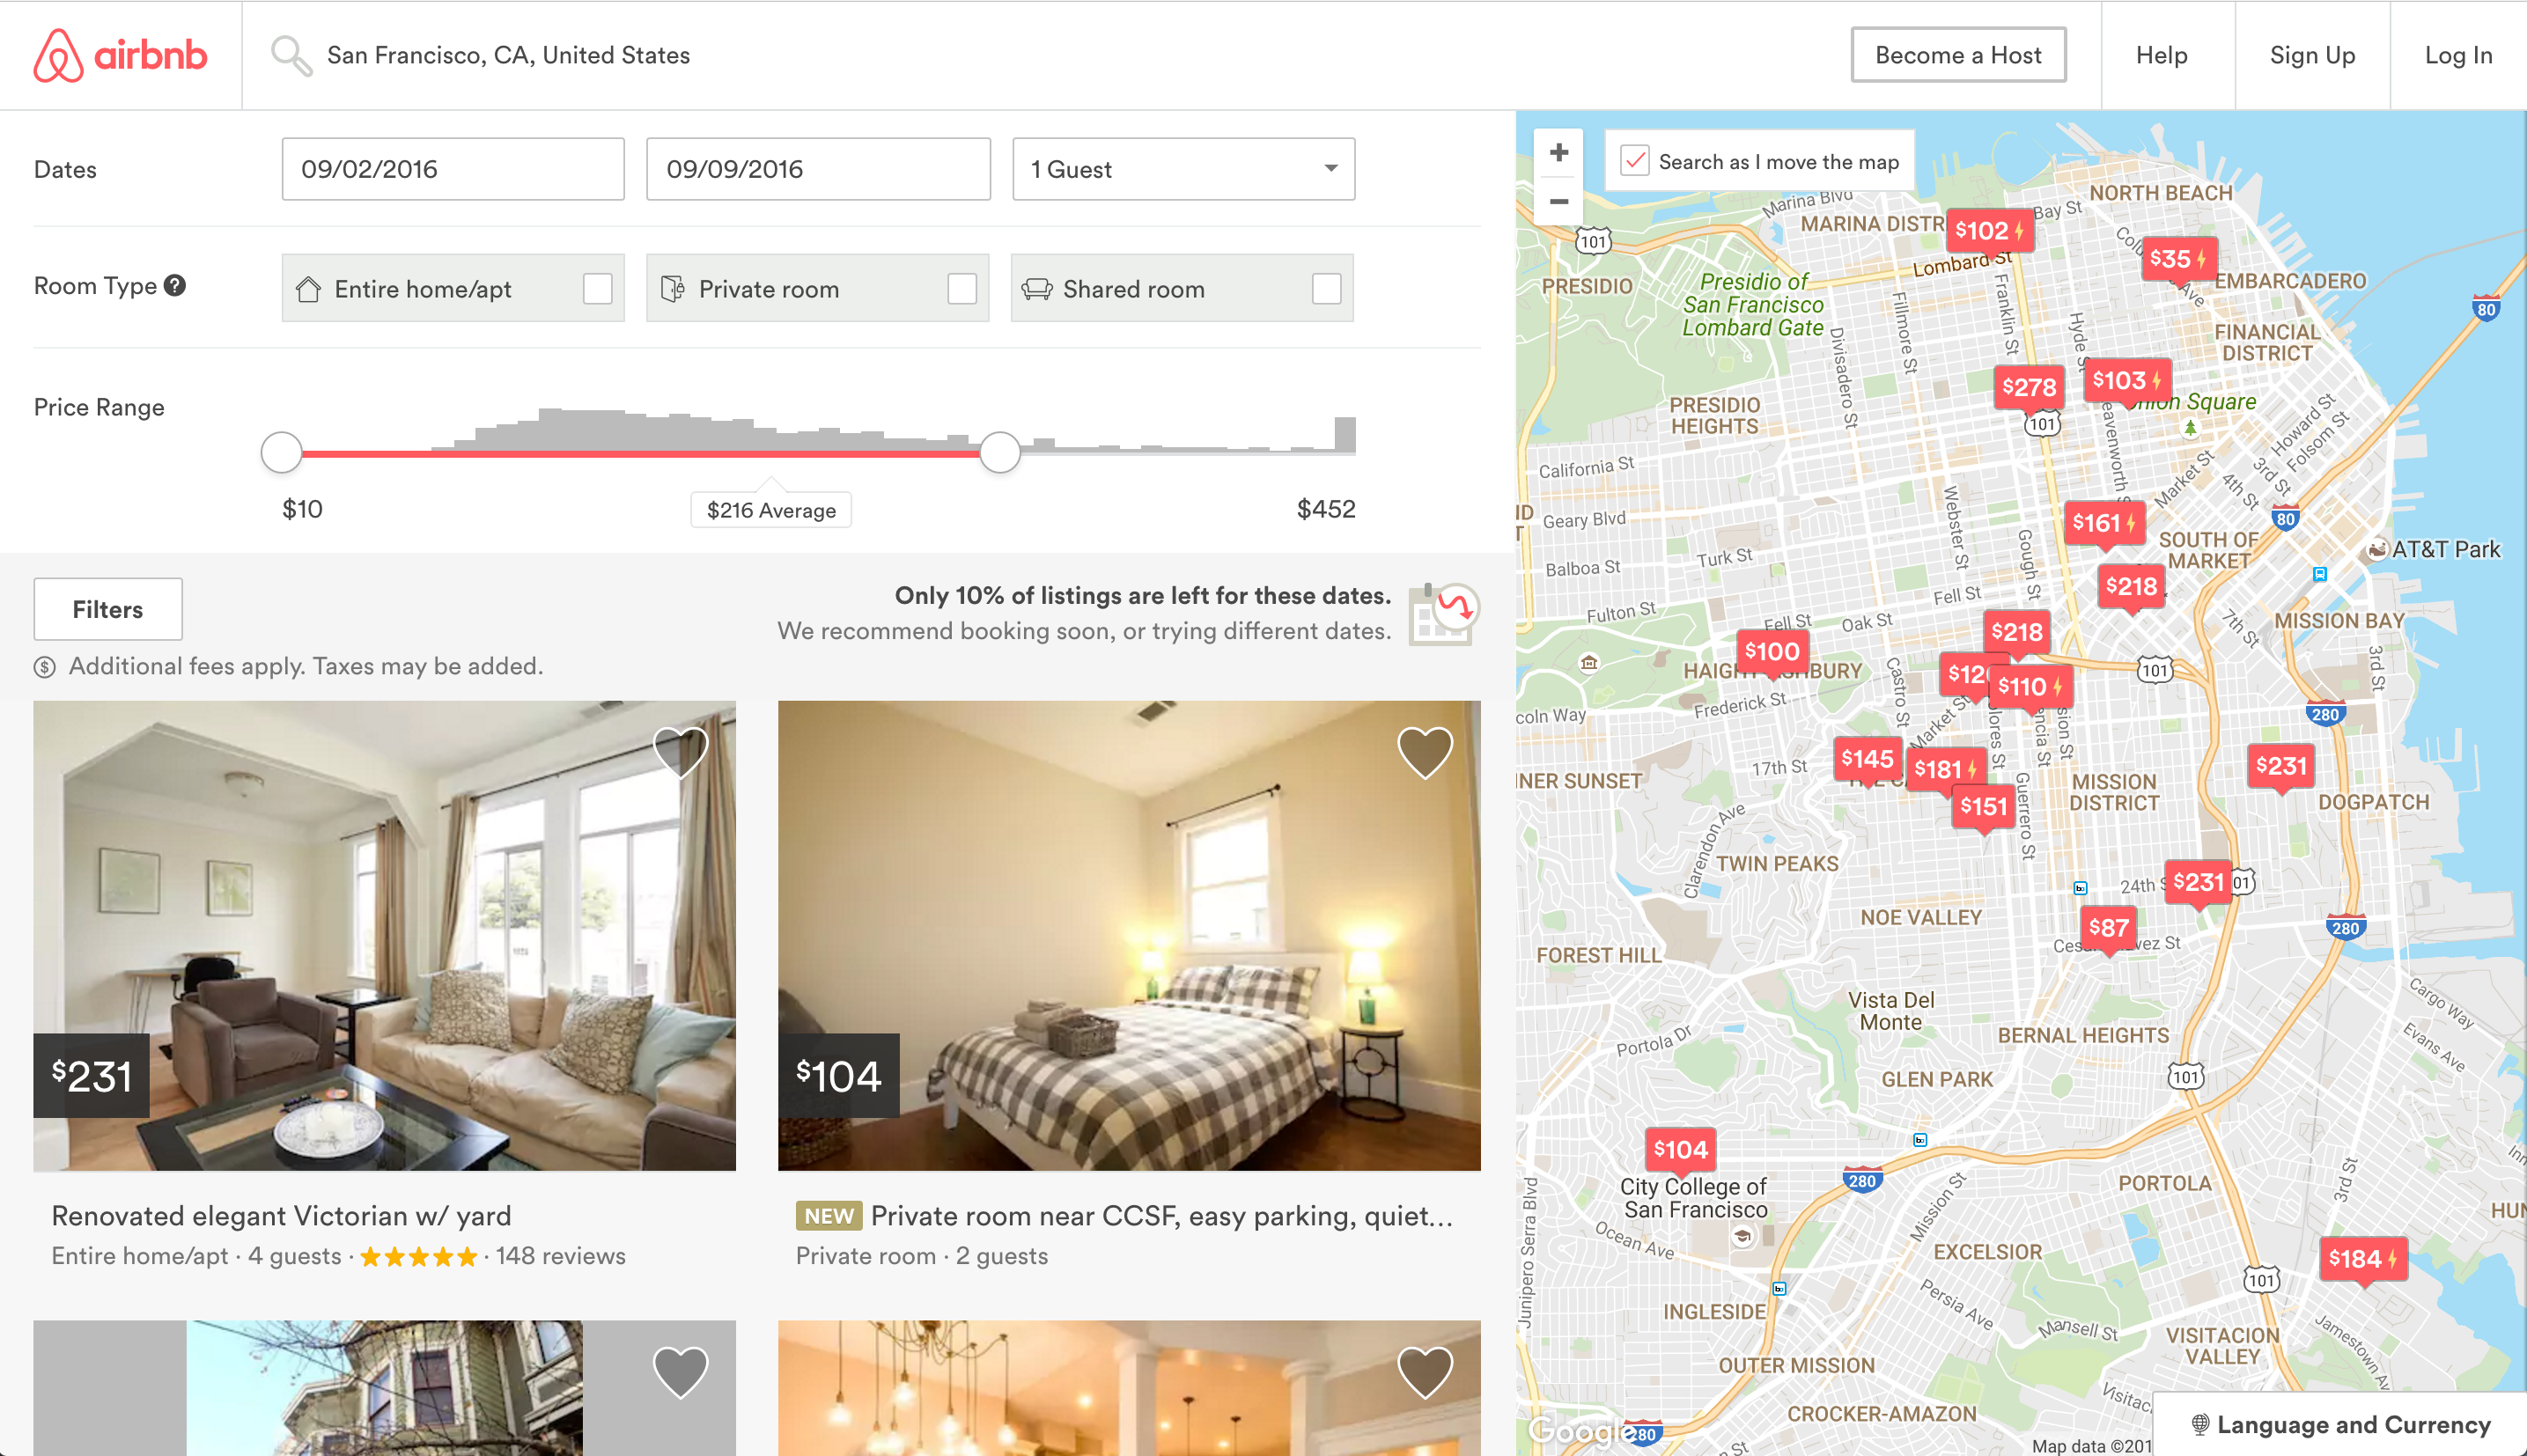

In [8]:
from IPython.display import Image
Image(filename='airbnb.png')

In [ ]:
# 作为东道主，如果我们试图收取高于市场价格的生活空间，我们想租，然后租房者会选择与我们类似的更实惠的替代品。
# 如果我们设定我们的夜租租金太低，我们会 错过了潜在的收入。

# 我们可以使用的一个策略是：
    # 找到几个与我们类似的列表，
    # 平均与我们最相似的价格，
    # 将我们的上市价格设置为这个平均价格。
    
# 发现现有数据中的模式以进行预测的过程称为机器学习。 在我们的情况下，我们希望使用本地列表的数据来预测我们设置的最优价格。 
# 在这个任务中，我们将探索一个特定的机器学习技术，称为k-最近邻居，这反映了我们刚刚描述的策略。 
# 在我们深入研究机器学习和k近邻之前，让我们熟悉我们将要使用的数据集。

## 2. Introduction to the data

In [ ]:
# 虽然AirBnB没有公布其市场上的任何数据，但另一个名为Inside AirBnB的组织已经提取了网站上许多主要城市的样本数据。 
# 在这篇文章中，我们将从2015年10月3日起使用他们的数据集来处理来自美国首都华盛顿的列表。 
# 这是直接链接到该数据集。 数据集中的每一行都是一个特定的列表，可以在华盛顿特区的AirBnB上租用

# 为了减少数据集的繁琐工作，我们删除了原始数据集中的许多列，并将文件重命名为dc_airbnb.csv。 这里是我们保留的列：
#     host_response_rate：主机的响应率
#     host_acceptance_rate：转换为租赁的主机的请求数
#     host_listings_count：主机拥有的其他列表的数量
#     纬度：地理坐标的纬度维度
#     经度：坐标的经度部分
#     城市：居住空间所在的城市
#     邮政编码：居住空间所在的邮政编码
#     状态：居住空间所在的状态
#     可容纳：租金可容纳的客人数量
#     房间类型：居住空间类型（私人房间，合住房间或整个房子/公寓
#     卧室：包括在租金中的卧室数量
#     浴室：包括在租金中的浴室数量
#     床：包括在租金中的床数量
#     价格：每晚租金的价格
#     cleaning_fee：客人离开后用于清洁居住空间的额外费用
#     security_deposit：可退还的保证金，以防损坏
#     minimum_nights：客人可以租用的最低晚数
#     maximum_nights：客人可以租用的最长住宿天数
#     number_of_reviews：以前的客人已经离开的评论数量

# 让我们把数据集读入pandas，并对其更加熟悉。

In [ ]:
# Instructions
# Read dc_airbnb.csv into a Dataframe named dc_listings.
# Use the print function to display the first row in dc_listings.

In [4]:
# Answer
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')
print(dc_listings.iloc[0])

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


## 3. K-nearest neighbors

In [ ]:
# 这是我们想要使用的策略：
#     找到几个类似的列表。
#     计算这些列表的平均夜间租赁价格。
#     将平均价格设置为我们列表的价格。

# k最近邻算法与此策略相似。 这里有一个概述：

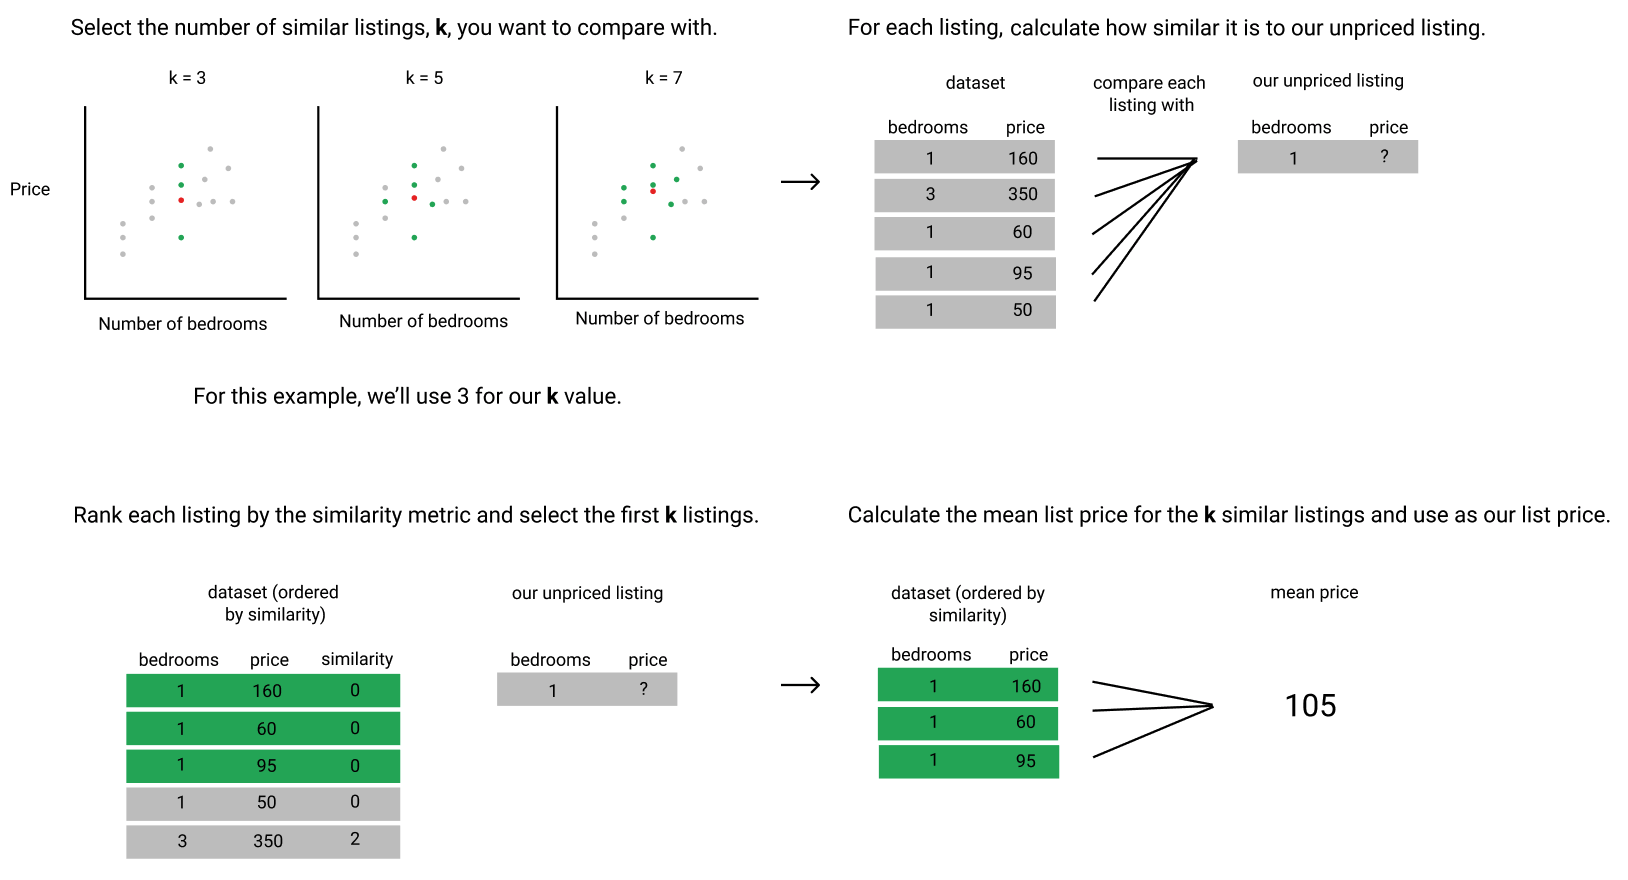

In [9]:
from IPython.display import Image
Image(filename='knn_infographic.png')

In [ ]:
# 有两件事我们需要更详细地解释：
    # 相似性度量
    # 如何选择k值
# 在这个任务中，我们将定义我们要使用的相似性度量。 然后，我们将实现k最近邻居算法，并使用它来为新的，未定价的列表建议价格。 
# 我们将在这个任务中使用5的k值。 在后面的任务中，我们将学习如何评估建议价格的好坏，如何选择最佳的k值等等。

## 4. Euclidean distance

In [ ]:
# 相似性度量通过比较一组固定的数字特征，另一个属性词，在两个观察值之间，或我们的情况下的居住空间。 
# 当试图预测一个连续的价值，如价格，主要的相似度度量是欧氏距离。 这里是欧几里德距离的一般公式：

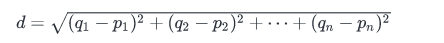

In [11]:
from IPython.display import Image
Image(filename='distance.png')

In [ ]:
# 其中q1到qn代表一个观测的特征值，而p1到pn代表另一个观测的特征值。 
# 下面是一个图表，它仅使用host_listings_count，容纳卧室，浴室和床列来分解数据集中前两个观察值之间的欧几里德距离：

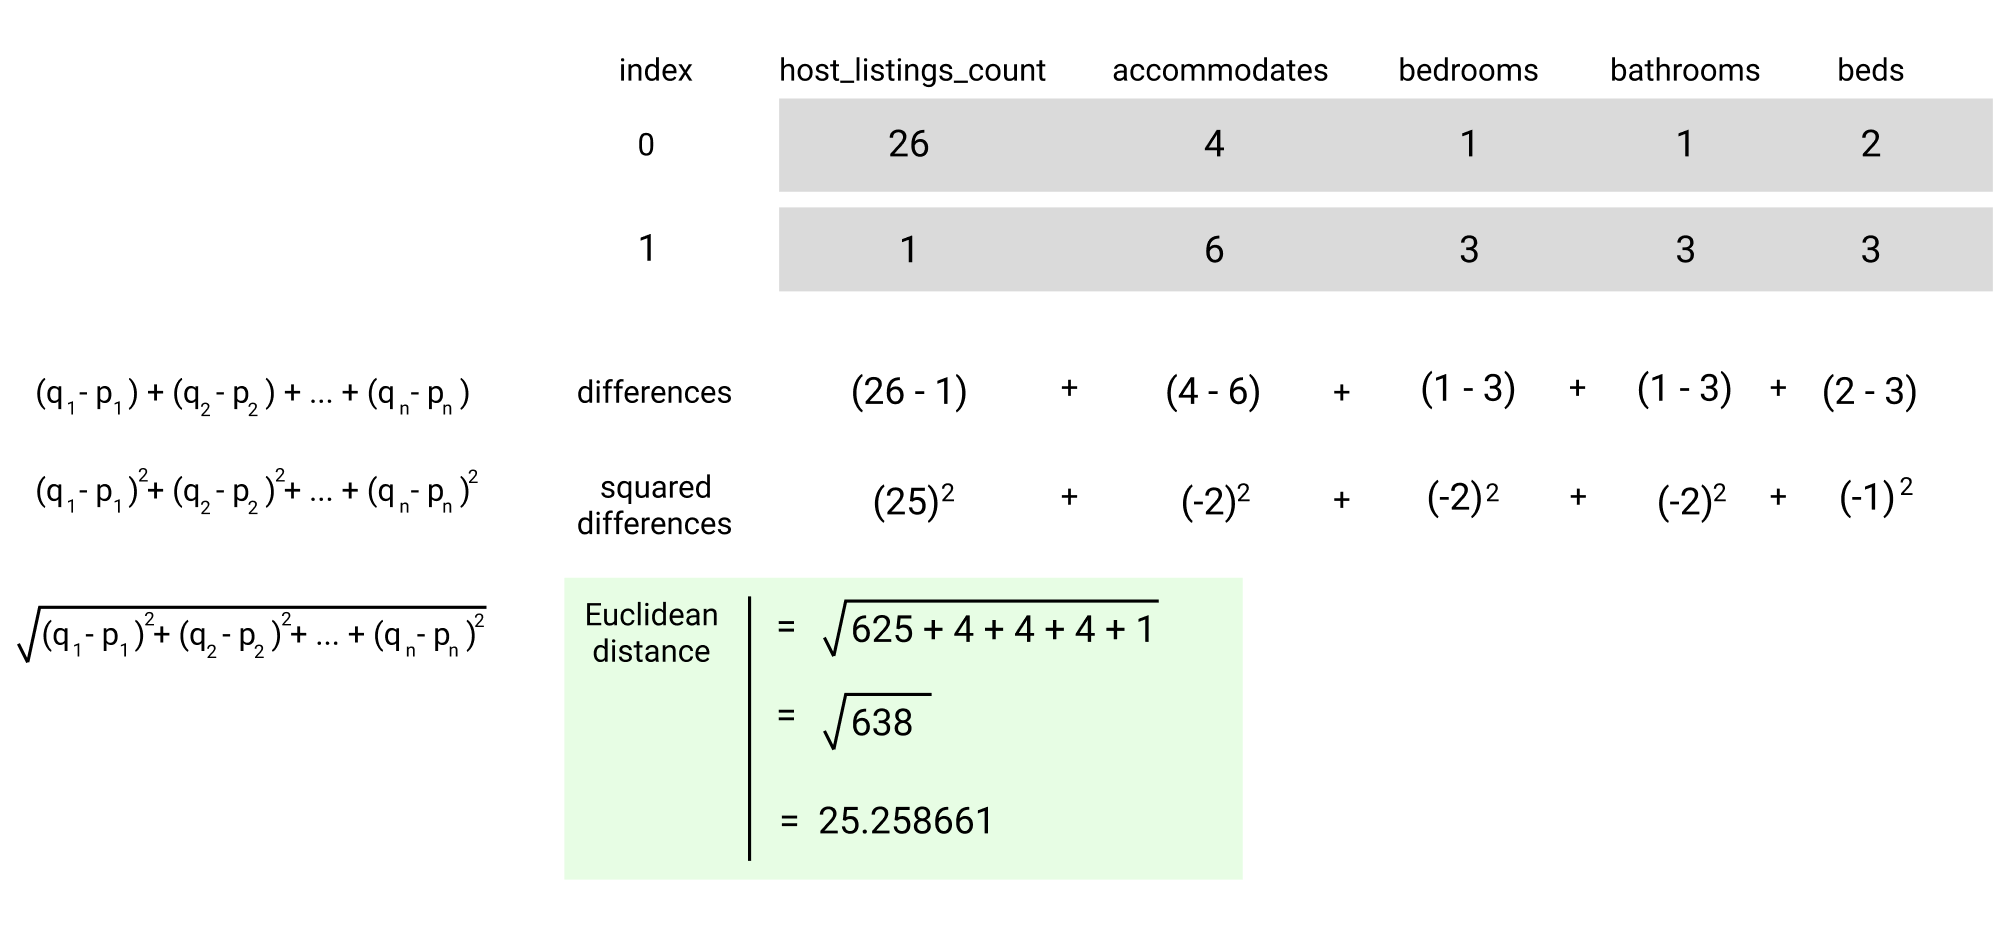

In [12]:
from IPython.display import Image
Image(filename='euclidean_distance_five_features.png')

In [ ]:
# 在这个任务中，我们将只使用这个任务中的一个功能，以便在熟悉机器学习工作流程时保持简单。 
# 由于我们只使用了一个特征，这就是所谓的单变量情况。 以下是公式对单变量情况的看法：

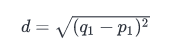

In [13]:
from IPython.display import Image
Image(filename='1.png')

In [ ]:
# 平方根公式简化为：

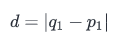

In [14]:
from IPython.display import Image
Image(filename='2.png')

In [ ]:
# 我们想租的生活空间可以容纳3人。 我们首先使用数据集中的第一个生存空间和我们自己的数据集之间的容差特征来计算距离。

In [ ]:
# Instructions
# 计算可容纳3人的生活空间与dc_listings Dataframe中的第一个生存空间之间的欧几里德距离。
# 将结果分配给first_distance，并使用打印功能显示该值。

In [21]:
import numpy as np
our_acc_value = 3
first_living_space_value = dc_listings.iloc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


## 5. Calculate distance for all observations

In [ ]:
# dc_listings Dataframe中第一行与我们自己的生存空间之间的欧几里德距离是1.
# 我们如何知道这是高还是低？ 如果你看看欧几里得距离方程本身，你可以达到的最低值是0.
# 当这个特征的值与你正在比较的两个观测值完全相同时，就会发生这种情况。 如果p1 = q1，那么d = | q1-p1 | 这导致d = 0。 
# 距离越近，生活空间就越相似。

# 如果我们要计算数据集中每个生存空间与可容纳8个人的生存空间之间的欧氏距离，可以预览一下这个空间的样子。

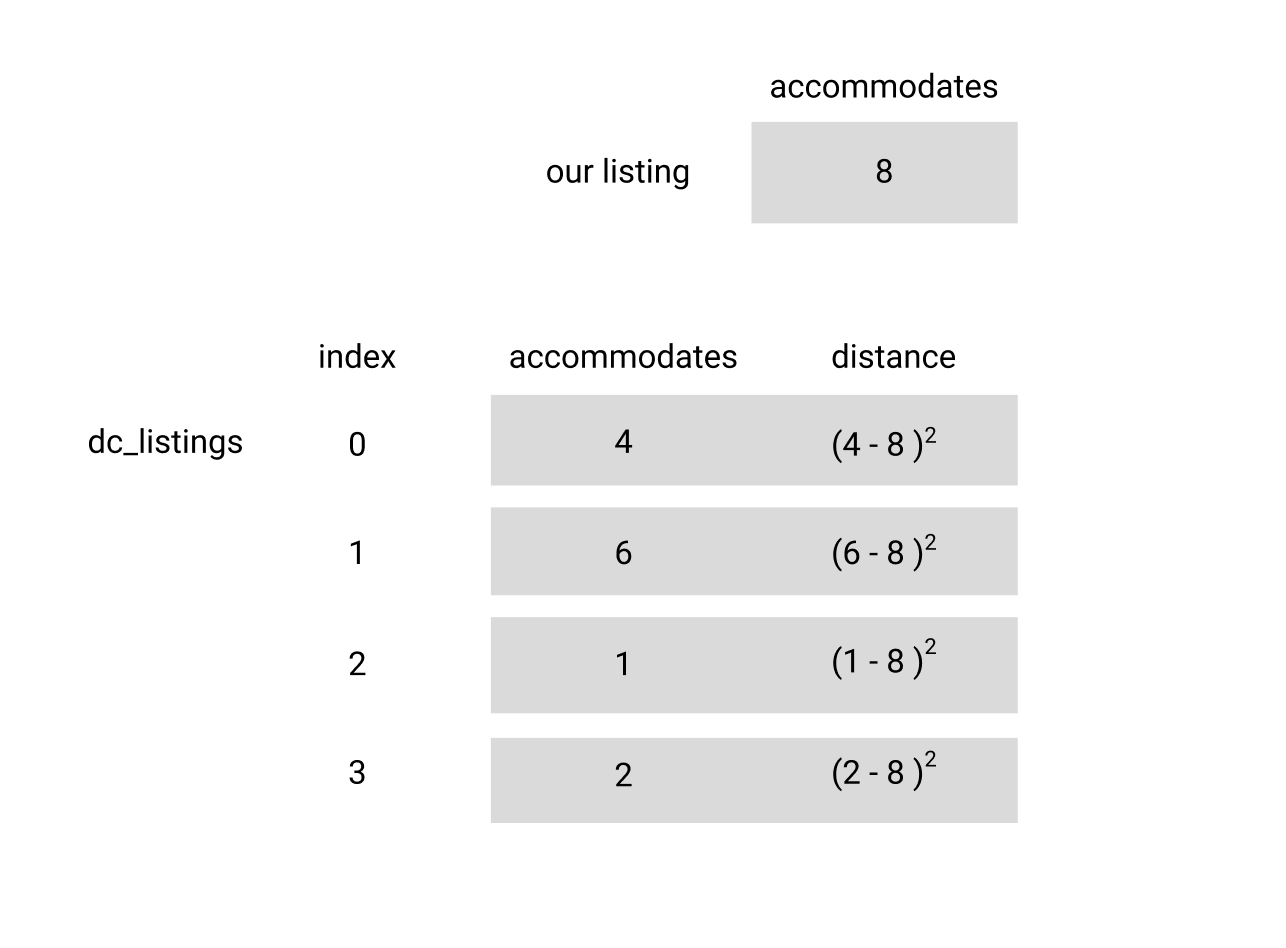

In [22]:
from IPython.display import Image
Image(filename='distance_between_rows_and_ours.png')

In [ ]:
# 然后，我们可以通过递增的距离值来排序现有的生存空间，即相似度的代理。

In [ ]:
# Instructions
# Calculate the distance between each value in the accommodates column from dc_listings and the value 3, 
# which is the number of people our listing accommodates:

#     Use the apply method to calculate the absolute value between each value in accommodates and 3 
#     and return a new Series containing the distance values.

# Assign the distance values to the distance column.

# Use the Series method value_counts and the print function to display the unique value counts for the distance column.

# 计算dc_listings中容纳列中每个值与我们列表容纳人数的值3之间的距离：
    # 使用apply方法计算容器和3中每个值之间的绝对值，并返回包含距离值的新系列。
# 将距离值分配给距离列。
# 使用系列方法value_counts和打印功能显示距离列的唯一值计数。

In [32]:
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))

print(dc_listings['accommodates'])
print("--- ---- ---- ---")
print(dc_listings['distance'])
# print(dc_listings['distance'].value_counts())

0       4
1       6
2       1
3       2
4       4
5       4
6       4
7       2
8       2
9       2
10      4
11      1
12      2
13      2
14      2
15      2
16      1
17      2
18      4
19      2
20      2
21      2
22      7
23      1
24      4
25      4
26      3
27      4
28      2
29      2
       ..
3693    1
3694    6
3695    4
3696    2
3697    3
3698    2
3699    4
3700    4
3701    2
3702    4
3703    6
3704    6
3705    5
3706    6
3707    3
3708    2
3709    2
3710    2
3711    2
3712    4
3713    5
3714    3
3715    1
3716    5
3717    7
3718    4
3719    2
3720    6
3721    2
3722    3
Name: accommodates, dtype: int64
--- ---- ---- ---
0       1
1       3
2       2
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      2
12      1
13      1
14      1
15      1
16      2
17      1
18      1
19      1
20      1
21      1
22      4
23      2
24      1
25      1
26      0
27      1
28      1
29      1
       ..
3693    2
3694    3
3695    1

## 6. Randomizing, and sorting

In [ ]:
# 看起来好像有不少，461就是精确的，可以容纳3个人的生活空间就像我们一样。 
# 这意味着我们在排序后选择的5个“最近邻居”将具有0的距离值。如果我们按距离列排序，然后选择前5个生存空间，则将结果偏置到数据集的排序。

In [33]:
dc_listings[dc_listings["distance"] == 0]["accommodates"]

26      3
34      3
36      3
40      3
44      3
45      3
48      3
65      3
66      3
71      3
75      3
86      3
103     3
104     3
108     3
115     3
124     3
125     3
129     3
130     3
131     3
133     3
136     3
140     3
146     3
147     3
150     3
151     3
162     3
164     3
       ..
3437    3
3451    3
3478    3
3488    3
3506    3
3510    3
3514    3
3515    3
3546    3
3555    3
3560    3
3568    3
3572    3
3578    3
3582    3
3593    3
3603    3
3612    3
3619    3
3625    3
3626    3
3631    3
3640    3
3651    3
3667    3
3675    3
3697    3
3707    3
3714    3
3722    3
Name: accommodates, dtype: int64

In [ ]:
# 让我们来随机化数据集的顺序，然后按距离列对数据框进行排序。 
# 这样，具有相同卧室数量的所有居住空间仍将位于数据框的顶部，但在前461行中将随机排列。 
# 我们已经完成了设置随机种子的第一步，所以我们可以在我们的结尾进行答案检查。

In [ ]:
# Instructions
# 随机化dc_listings中的行的顺序：
#     使用np.random.permutation（）函数返回一个NumPy数组的混洗索引值。
#     使用Dataframe方法loc []返回包含混洗订单的新数据框。
#     将新的数据帧分配回dc_listings。

# 随机化后，按距离列对dc_listings进行排序。

# 使用打印功能显示价格栏中的前10个值。

In [51]:
import numpy as np
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

dc_listings

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


host_response_rate host_acceptance_rate  host_listings_count  \
577                 98%                  52%                   49   
2166               100%                  89%                    2   
3631                98%                  52%                   49   
71                 100%                  94%                    1   
1011                NaN                  NaN                    1   
380                 58%                  51%                  480   
943                 NaN                  NaN                    1   
3107                NaN                  NaN                    1   
1499                62%                  77%                    1   
625                100%                   0%                    1   
1309                86%                 100%                    1   
1252               100%                 100%                    1   
1744               100%                  NaN                    1   
2334               100%                   0%                    2   
749                 91%                  95%                    4   
1141               100%                 100%                    1   
1855                67%                  NaN                    1   
1823               100%                 100%                    1   
1040               100%                 100%                    2   
1791               100%                  86%                    1   
2055                NaN                  NaN                    1   
2622               100%                  NaN                    1   
334                 32%                  80%                    8   
2528                91%                 100%                    5   
963                100%                   0%                    1   
2282                67%                  NaN                    1   
976                100%                  94%                   12   
306                 58%                  51%                  480   
492                 90%                 100%                    1   
176                100%                 100%                    1   
...                 ...                  ...                  ...   
1885                80%                  NaN                    4   
1326                79%                  72%                    3   
1878                80%                  NaN                    4   
1656               100%                 100%                    2   
3305               100%                 100%                    2   
1879                80%                  NaN                    4   
2995               100%                 100%                    6   
542                100%                 100%                    4   
1875                80%                  NaN                    4   
529                 91%                  69%                    8   
571                 91%                  69%                    8   
3524               100%                 100%                    1   
562                100%                  93%                    6   
1403               100%                  93%                    6   
1658               100%                 100%                    2   
685                100%                  93%                    6   
2106               100%                  93%                    6   
2688               100%                 100%                    4   
1850                94%                  59%                    2   
2757               100%                 100%                    6   
1806               100%                 100%                    6   
657                 92%                  91%                   26   
1594                88%                 100%                    1   
611                 98%                  79%                    6   
2560               100%                  NaN                    1   
1596               100%                  95%                    3   
181

## 7. Average price

In [ ]:
# 在我们选择5个最相似的居住空间并计算平均价格之前，我们需要清理价格栏。 
# 现在，价格列包含逗号字符（，）和美元符号字符，并被格式化为文本列而不是数字。 
# 我们需要删除这些值并将整个列转换为float数据类型。 然后，我们可以计算平均价格。

In [61]:
# 从价格列中删除逗号（，）和美元符号字符（$）：

#     使用str访问器，以便我们可以将字符串方法应用于列中的每个值，
#     然后使用字符串方法replace将所有逗号字符替换为空字符：
#     stripped_commas = dc_listings['price'].str.replace(',', '')

#     重复删除美元符号字符。

# 将包含已清理值的新Series对象转换为float数据类型，并将其分配回dc_listings中的price列。
# 计算价格列中前5个值的均值，并分配给mean_price。
# 使用下面的print或变量检查器来显示mean_price。stripped_commas = dc_listings['price'].str.replace(',', '')


In [66]:

print(dc_listings)
print('--- --- ---')

stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
print(dc_listings)
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

     host_response_rate host_acceptance_rate  host_listings_count  \
577                 98%                  52%                   49   
2166               100%                  89%                    2   
3631                98%                  52%                   49   
71                 100%                  94%                    1   
1011                NaN                  NaN                    1   
380                 58%                  51%                  480   
943                 NaN                  NaN                    1   
3107                NaN                  NaN                    1   
1499                62%                  77%                    1   
625                100%                   0%                    1   
1309                86%                 100%                    1   
1252               100%                 100%                    1   
1744               100%                  NaN                    1   
2334               100%           